In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
housing_price = fetch_california_housing(as_frame=True, return_X_y=True)

In [9]:
type(housing_price)

tuple

In [10]:
len(housing_price)

2

In [11]:
X, y = housing_price

In [12]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [13]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [17]:
model.compile(loss='mse', optimizer = 'adam', metrics=['RootMeanSquaredError'])

In [18]:
history = model.fit(X_train, y_train)

484/484 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - RootMeanSquaredError: 6.4802 - loss: 50.5205


In [20]:
y_predict = model.predict(X_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [21]:
mean_squared_error(y_test, y_predict)

2.1212859394869095

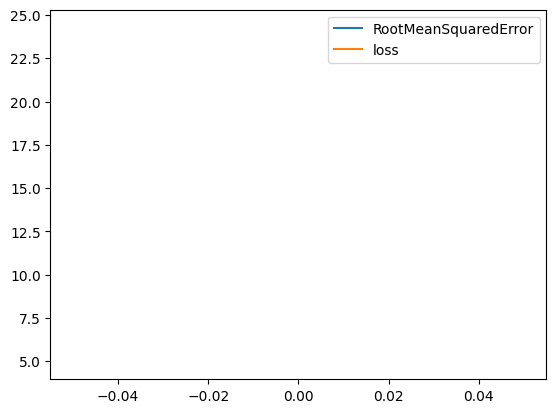

In [25]:
pd.DataFrame(history.history).plot()

plt.show()